# Connect Previous Parts
Combine previous parts and do visualization (using Matplotlib python) to see how tweet sentiment and stock quotes changes overtime.

The better tool to do visualization is Tableu, it’s very easy to use and click. Here is the link to download: https://public.tableau.com/en-us/s/download

After installing this software, upload the final file and you can see results.



Final: Research

Answers the following questions:
+ Do you see any trend, correlation?
+ If not, why, if yes, why
+ Can you change the way you collect tweets and stock information to get better visualization?
+ Can you visualize many things at onces to spot trends better?
+ What’s the conclusion?
+ Refine your code, make it pretty, use Jupyter Notebook and Markdown to make nice documentation with good graphics


In [35]:
import pandas as pd
import datetime

In [36]:
# import data
df=pd.read_csv("../data/9.pulledTweetsSentimentResult.csv",usecols=['text','created_at','builtModel_sentiment','vader_score'])
df.tail()

,created_at,text,builtModel_sentiment,vader_score
219,Tue Apr 27 23:58:10 +0000 2021,Sometimes you get a third chance Love s Thir...,1,0.8020
220,Tue Apr 27 23:58:10 +0000 2021,Check out this Amazon deal The Art of My Neig...,1,0.3767
221,Tue Apr 27 23:58:08 +0000 2021,First Steps How Upright Walking Made Us Hum...,1,0.0000
222,Tue Apr 27 23:58:04 +0000 2021,The First Day of Spring by Nancy Tucker B...,1,0.4019
223,Tue Apr 27 23:58:04 +0000 2021,ad off Galaxy Star Projector ...,1,0.0000


 https://pandas.pydata.org/docs/reference/api/pandas.Timestamp.html

In [37]:
# transform datetime to simplier form for graphs
df.created_at=df.apply(lambda x: str(pd.Timestamp(x.created_at,unit='d'))[:10], axis=1)
df.tail()

,created_at,text,builtModel_sentiment,vader_score
219,2021-04-27,Sometimes you get a third chance Love s Thir...,1,0.8020
220,2021-04-27,Check out this Amazon deal The Art of My Neig...,1,0.3767
221,2021-04-27,First Steps How Upright Walking Made Us Hum...,1,0.0000
222,2021-04-27,The First Day of Spring by Nancy Tucker B...,1,0.4019
223,2021-04-27,ad off Galaxy Star Projector ...,1,0.0000


ipykernel_launcher:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipykernel_launcher:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,builtModel_sentiment,vader_score,vaderMovement,builtModelMovement
created_at,,,,
2021-04-26,0.000000,0.406300,,
2021-04-27,0.629630,0.122648,-0.283652,0.62963
2021-04-28,0.500000,0.117831,-0.00481759,-0.12963
2021-04-29,0.294118,0.348474,0.230643,-0.205882
2021-04-30,0.473684,0.090521,-0.257952,0.179567
2021-05-01,0.529412,0.222053,0.131532,0.0557276
2021-05-02,0.515152,0.273052,0.0509986,-0.0142602
2021-05-03,0.675676,0.213811,-0.0592407,0.160524
NaT,1.000000,0.000000,-0.213811,0.324324


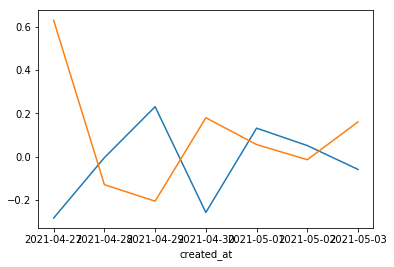

In [38]:
#Group average sentiment score by dates

df=df.groupby('created_at').mean()

df['vaderMovement'], df['builtModelMovement']='',''
for i in range(len(df)-1):
    df.vaderMovement[i+1]=df['vader_score'][i+1]-df['vader_score'][i]
    df.builtModelMovement[i+1]=df['builtModel_sentiment'][i+1]-df['builtModel_sentiment'][i]

df.vaderMovement['2021-04-27':'2021-05-03'].plot()
df.builtModelMovement['2021-04-27':'2021-05-03'].plot()
df

ipykernel_launcher:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Adj Close,stockMovement
Date,,
2021-04-23,261.149994,0
2021-04-26,261.549988,0
2021-04-27,261.970001,0
2021-04-28,254.559998,-7
2021-04-29,252.509995,-2
2021-04-30,252.179993,0
2021-05-03,251.860001,0


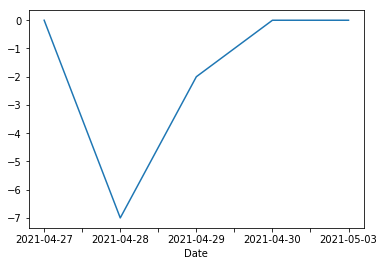

In [39]:
df2=pd.read_csv('../data/10.pulledStockPrices.csv',usecols=['Date','Adj Close'])
df2['stockMovement']=0
for i in range(len(df2)-1):
    df2.stockMovement[i+1]=df2['Adj Close'][i+1]-df2['Adj Close'][i]
df2=df2.set_index('Date')
df2.stockMovement['2021-04-27':'2021-05-03'].plot()
df2